# Comparing SGD to GD
We'll do some simple comparisons between SGD and GD. We will consider mostly convex problems, like classification and regression.
Remember, that what we would like to minimize is a finite sum of losses
$$\min_{\bf x} \frac{1}{n} \sum_{i=1}^n f_i({\bf x}) $$
The algorithmic iteration of SGD is
$${\bf x}_{k+1} = {\bf x}_k -\gamma_{SGD}\cdot \nabla f_{s_k} ({\bf x}_k)$$
That of Gradient Descent (GD) is given by
$${\bf x}_{k+1} = {\bf x}_k -\gamma_{GD}\cdot \frac{1}{n} \sum_{i=1}^n \nabla f_i({\bf x})$$

In [3]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import random

# SGD function
# -------------------------------------------------------
#
# X - train dataset matrix
# y - train label vector
# X_test - test dataset matrix
# y_test - test label vector
# sgd_w - initial weights for model
# gradient_at_datapoint(weights, datapoint) - function returning gradient at datapoint given weights
# compute_loss(X, y, weights) - computes loss given X dataset, y labels and model weights
# n_iters - number of iters to train sgd
# sgd_gamma - sgd learning rate
#
# return - array of train losses and test losses
def SGD(X, y, X_test, y_test, sgd_w, gradient_at_datapoint, compute_loss, n_iters=100, sgd_gamma=.001):
    n, d = X.shape
    test_losses, train_losses = [], []
    sgd_datapoint_order = list(range(0, n))
    for iteration in range(n_iters):
        np.random.shuffle(sgd_datapoint_order)
        train_loss, test_loss = compute_loss(X, y, sgd_w), compute_loss(X_test, y_test, sgd_w)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        for datapoint_index in sgd_datapoint_order:
            gradient_at_dp = gradient_at_datapoint(sgd_w, X[datapoint_index], y[datapoint_index])
            sgd_w = sgd_w - sgd_gamma * gradient_at_dp.T
    return train_losses, test_losses, sgd_w
        
# GD function
# -------------------------------------------------------
#
# X - train dataset matrix
# y - train label vector
# X_test - test dataset matrix
# y_test - test label vector
# gd_w - initial weights for model
# compute_gradient(X, y, weights) - function returning gradient given X, y, weights
# compute_loss(X, y, weights) - computes loss given X dataset, y labels and model weights
# n_iters - number of iters to train sgd
# gd_gamma - sgd learning rate
#
# return - array of train losses and test losses
def GD(X, y, X_test, y_test, gd_w, compute_gradient, compute_loss, n_iters=100, gd_gamma=.001):
    n, d = X.shape
    test_losses, train_losses = [], []
    for iteration in range(n_iters):
        train_loss, test_loss = compute_loss(X, y, gd_w), compute_loss(X_test, y_test, gd_w)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        gradient = compute_gradient(X, y, gd_w)
        gd_w = gd_w - gd_gamma * gradient/X.shape[0]
    return train_losses, test_losses, gd_w
        


Let's try a simple linear regression problem, where we want to solve
$$\min_{\bf w} \frac{1}{n} \sum_{i=1}^n ({\bf x}_i^T{\bf w}-y_i)^2$$

# Example of train vs test error, in lin. regression

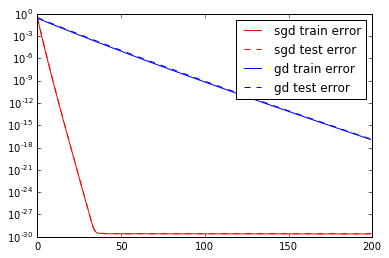

In [2]:
%matplotlib inline
np.random.seed(0)

def GenerateGaussianLogisticRegressionDataset(n, d, n_test, sparsity=0):
    X = np.mat(np.random.rand(n,d))
    X_test = np.mat(np.random.rand(n_test,d))
    w_opt = np.mat(np.random.rand(d,1))
    
    # Zero out some elements based on sparsity (approximate)
    for i in range(n):
        for j in range(d):
            if random.uniform(0, 1) < sparsity:
                X[i,j] = 0
                
    for i in range(n_test):
        for j in range(d):
            if random.uniform(0, 1) < sparsity:
                X_test[i,j] = 0
                
    y_test = X_test * w_opt
    y = X * w_opt
    return X, y, X_test, y_test

# Parameters for sgd and gd on gaussian linear regression
d = 20; 
n = 2000; 
n_test = 100; 
X, y, X_test, y_test = GenerateGaussianLogisticRegressionDataset(n, d, n_test, sparsity=.8)
T = 200

# Initial models for both sgd and gd are the same
gd_w = np.mat(np.random.rand(d,1))
sgd_w = gd_w

def ComputeLoss(X, y, w):
    return (linalg.norm(X*w-y)**2) / X.shape[0]

def GradientAtDatapoint(weights, datapoint_weights, datapoint_label):
    return (2 * (datapoint_weights * weights - datapoint_label)) * datapoint_weights

def ComputeGradient(X, y, w):
    return 2*(X.T*X*w - X.T*y)

sgd_train_losses, sgd_test_losses, sgd_w = SGD(X, y, X_test, y_test, sgd_w, 
                                        GradientAtDatapoint, ComputeLoss, 
                                        n_iters=T, sgd_gamma=.005)
gd_train_losses, gd_test_losses, gd_w = GD(X, y, X_test, y_test, gd_w, 
                                     ComputeGradient, ComputeLoss, 
                                     n_iters=T, gd_gamma=.9)

plt.semilogy(range(T), sgd_train_losses, 'r-', label="sgd train error")
plt.semilogy(range(T), sgd_test_losses, '--r', label="sgd test error")
plt.semilogy(range(T), gd_train_losses, 'b-', label="gd train error")
plt.semilogy(range(T), gd_test_losses, '--b', label="gd test error")
plt.legend(loc="upper right")
plt.show(); 

# Logistic regression
For logistic regression we are trying to minimize
$$\min_{\bf x} \frac{1}{n} \sum_{i=1}^n f_i(x) $$
where 
$$
f_i(x) = -y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))
$$
and
$$
h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}}
$$

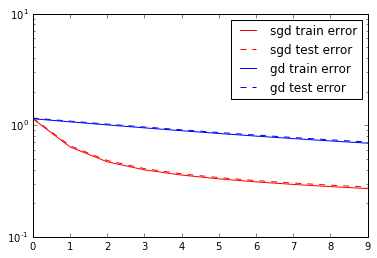

In [7]:
%matplotlib inline
np.random.seed(0)

def GenerateGaussianLogisticRegressionDataset(n, d, n_test, sparsity=0):
    X = np.mat(np.random.rand(n,d))
    w_opt = np.mat(np.random.rand(d,1)) - .5
    X_test = np.mat(np.random.rand(n_test,d))
    
    # Zero out some elements based on sparsity (approximate)
    for i in range(n):
        for j in range(d):
            if random.uniform(0, 1) < sparsity:
                X[i,j] = 0
                
    for i in range(n_test):
        for j in range(d):
            if random.uniform(0, 1) < sparsity:
                X_test[i,j] = 0
    
    y = np.mat([[0] if x.dot(w_opt) <= 0 else [1] for x in X])
    y_test = np.mat([[0] if x.dot(w_opt) <= 0 else [1] for x in X_test])
    return X, y, X_test, y_test

# Parameters for sgd and gd on gaussian logistic regression
d = 20; 
n = 2000; 
n_test = 100; 
X, y, X_test, y_test = GenerateGaussianLogisticRegressionDataset(n, d, n_test, sparsity=.8)
T = 10

# Initial models for both sgd and gd are the same
gd_w = np.mat(np.random.rand(d,1))
sgd_w = gd_w

def hyp(theta, x):
    r = float(1 / float(1 + np.exp(-x.dot(theta))))
    if r == 0:
        return 1e-10
    if r == 1:
        return 1 - 1e-10
    return r

def ComputeLossLogReg(X, y, theta):
    loss = 0
    for i, x in enumerate(X):
        loss += -y[i] * np.log(hyp(theta, x)) - (1-y[i]) * np.log((1 - hyp(theta, x)))
    return float(loss / X.shape[0])

def GradientAtDatapointLogReg(weights, datapoint_weights, datapoint_label):
    h = hyp(weights, datapoint_weights)
    sgd_grad = datapoint_weights.T * (h-datapoint_label)
    return sgd_grad.T

def ComputeGradientLogReg(X, y, w):
    h = np.matrix([[hyp(w, x)] for x in X])
    gd_grad = (X.T * (h-y))
    return gd_grad

sgd_train_losses, sgd_test_losses, sgd_w = SGD(X, y, X_test, y_test, sgd_w, 
                                        GradientAtDatapointLogReg, ComputeLossLogReg, 
                                        n_iters=T, sgd_gamma=.005)
gd_train_losses, gd_test_losses, gd_w = GD(X, y, X_test, y_test, gd_w, 
                                     ComputeGradientLogReg, ComputeLossLogReg, 
                                     n_iters=T, gd_gamma=.9)

plt.semilogy(range(T), sgd_train_losses, 'r-', label="sgd train error")
plt.semilogy(range(T), sgd_test_losses, '--r', label="sgd test error")
plt.semilogy(range(T), gd_train_losses, 'b-', label="gd train error")
plt.semilogy(range(T), gd_test_losses, '--b', label="gd test error")
plt.legend(loc="upper right")
plt.show(); 

# Logistic Regression on Mnist (2 digits only)

In your ipython source code directory, please run

#!/bin/bash

mkdir data

cd data

wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz

wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

gunzip *



In [5]:
from mnist import MNIST

NUM_CLASSES = 10

def load_dataset():
    print("Loading mnist data....")

    mndata = MNIST('./data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    X_train = X_train[:,:,np.newaxis]
    X_test = X_test[:,:,np.newaxis]
    
    # Filter out examples that are not 0 or 1
    X_train_filtered, labels_train_filtered = [], []
    X_test_filtered, labels_test_filtered = [], []
    for index, c in enumerate(labels_train):
        if c == 0 or c == 9:
            X_train_filtered.append([x[0] for x in X_train[index]])
            labels_train_filtered.append([c/9])
    
    for index, c in enumerate(labels_test):
        if c == 0 or c == 9:
            X_test_filtered.append([x[0] for x in X_test[index]])
            labels_test_filtered.append([c/9])
            
    X_train_filtered = np.mat(X_train_filtered)
    labels_train_filtered = np.mat(labels_train_filtered)
    X_test_filtered = np.mat(X_test_filtered)
    labels_test_filtered = np.mat(labels_test_filtered)
    
    print(X_train_filtered.shape, labels_train_filtered.shape)
    print(X_test_filtered.shape, labels_test_filtered.shape)
    print("Done loading mnist")
    
    return X_train_filtered, labels_train_filtered, X_test_filtered, labels_test_filtered

X_mnist, y_mnist, X_test_mnist, y_test_mnist = load_dataset()

Loading mnist data....
((11872, 784), (11872, 1))
((1989, 784), (1989, 1))
Done loading mnist


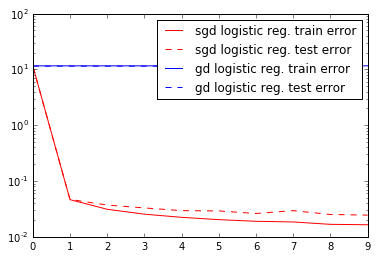

In [6]:
# Initial models for both sgd and gd are the same
gd_w = np.mat(np.random.rand(784,1))
sgd_w = gd_w
T = 10

sgd_train_losses, sgd_test_losses, sgd_w = SGD(X_mnist, y_mnist, X_test_mnist, y_test_mnist, sgd_w, 
                                       GradientAtDatapointLogReg, ComputeLossLogReg, 
                                       n_iters=T, sgd_gamma=.005)
gd_train_losses, gd_test_losses, gd_w = GD(X_mnist, y_mnist, X_test_mnist, y_test_mnist, gd_w, 
                                    ComputeGradientLogReg, ComputeLossLogReg, 
                                    n_iters=T, gd_gamma=.005)

plt.semilogy(range(T), sgd_train_losses, 'r-', label="sgd logistic reg. train error")
plt.semilogy(range(T), sgd_test_losses, '--r', label="sgd logistic reg. test error")
plt.semilogy(range(T), gd_train_losses, 'b-', label="gd logistic reg. train error")
plt.semilogy(range(T), gd_test_losses, '--b', label="gd logistic reg. test error")
plt.legend(loc="upper right")
plt.show(); 

# Comparing Neural Nets to Logistic Regression

In [ ]:
# pip install scikit-neuralnetwork
from sknn.mlp import Classifier, Layer

T = 10

def TrainAndPredictUsingNN(X, y, X_test, y_test, n_iters=20):
    nn = Classifier(
    layers=[
        Layer("Rectifier", units=2),
        Layer("Softmax")],
    learning_rate=0.02,
    n_iter=1)
    train_errors, test_errors = [], []
    for i in range(n_iters):
        nn.fit(X, y)
        predictions_train = nn.predict(X)
        predictions_test = nn.predict(X_test)
        n_wrong_train = sum([1 if pred != y[index] else 0 for index, pred in enumerate(predictions_train)])
        n_wrong_test = sum([1 if pred != y_test[index] else 0 for index, pred in enumerate(predictions_test)])
        train_errors.append(n_wrong_train / float(X.shape[0]))
        test_errors.append(n_wrong_test / float(X_test.shape[0]))
    return train_errors, test_errors 

def TrainAndPredictUsingLogReg(X, y, X_test, y_test, n_iters=20):
    sgd_w = np.mat(np.random.rand(784,1))
    train_errors, test_errors = [], []
    for i in range(n_iters):
        sgd_train_losses, sgd_test_losses, sgd_w = SGD(X_mnist, y_mnist, X_test_mnist, y_test_mnist, sgd_w, 
                                                       GradientAtDatapointLogReg, ComputeLossLogReg, 
                                                       n_iters=1, sgd_gamma=.005)
        predictions_train = [1 if hyp(sgd_w, x) >= .5 else 0 for x in X]
        predictions_test = [1 if hyp(sgd_w, x) >= .5 else 0 for x in X_test]
        n_wrong_train = sum([1 if pred != y[index] else 0 for index, pred in enumerate(predictions_train)])
        n_wrong_test = sum([1 if pred != y_test[index] else 0 for index, pred in enumerate(predictions_test)])
        train_errors.append(n_wrong_train / float(X.shape[0]))
        test_errors.append(n_wrong_test / float(X_test.shape[0]))
        #print(predictions_train)
    return train_errors, test_errors
        

nn_train_errors, nn_test_errors = TrainAndPredictUsingNN(X_mnist, y_mnist, X_test_mnist, y_test_mnist, n_iters=T)
sgd_train_errors, sgd_test_errors = TrainAndPredictUsingLogReg(X_mnist, y_mnist, X_test_mnist, y_test_mnist, n_iters=T)
plt.plot(range(T), sgd_train_errors, 'r-', label="sgd logistic reg. train num_wrong / total")
plt.plot(range(T), sgd_test_errors, '--r', label="sgd logistic reg. test num_wrong / total")
plt.plot(range(T), nn_train_errors, 'b-', label="nn train num_wrong / total")
plt.plot(range(T), nn_test_errors, '--b', label="nn test num_wrong / total")
plt.legend(loc="upper right")
plt.show()